### Import packages

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/jas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Get that Pickle!

In [3]:
df = pd.read_pickle('Gas_Data/raw_joined_df.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6684 entries, 1993-01-15 to 2018-04-24
Data columns (total 22 columns):
us_retail_wk_DPG           6684 non-null float64
wti_crudefuturesc1_DPG     6684 non-null float64
wti_crudefuturesc3_DPG     6684 non-null float64
nyh_HU_RBOBc1_DPG          6684 non-null float64
nyh_HU_RBOBc3_DPG          6684 non-null float64
wti_OKcrudespot_DPB        6684 non-null float64
us_crudestock_TB           6684 non-null float64
us_refyield_wk_pct         6684 non-null float64
us_refcrudeinput_wk_TBD    6684 non-null float64
us_production_wk_TBD       6684 non-null float64
US_production_TBD          6684 non-null float64
Global_production_TBD      6684 non-null float64
US_refcapac_TBD            6684 non-null float64
Global_refcapac_TBD        6684 non-null float64
US_PReserves_BB            6684 non-null float64
Global_PReserves_BB        6684 non-null float64
US_Imports_TBD             6684 non-null float64
US_Exports_TBD             6684 non-null f

# 3. EDA
1. histograms on each variable to view outliers and distributions
2. get annual view with scatterplots by year  

## Histograms to understand variables, identify outliers

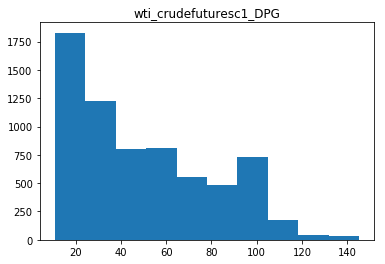

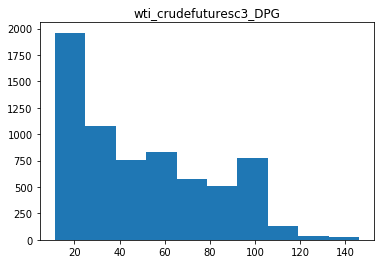

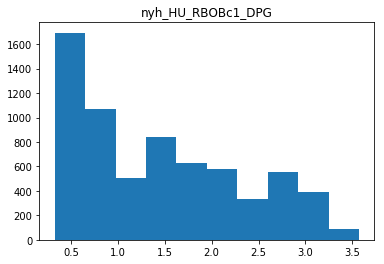

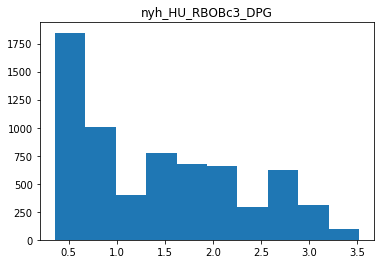

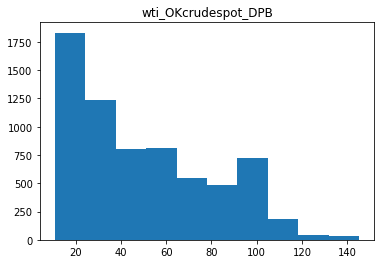

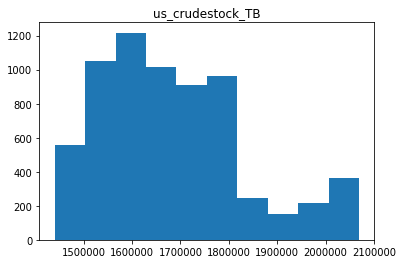

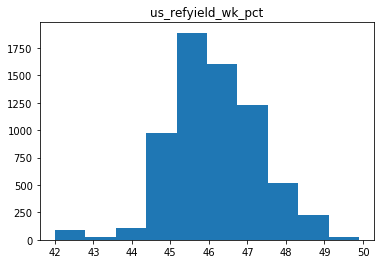

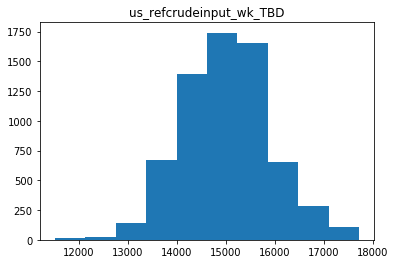

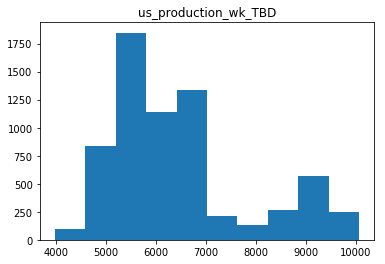

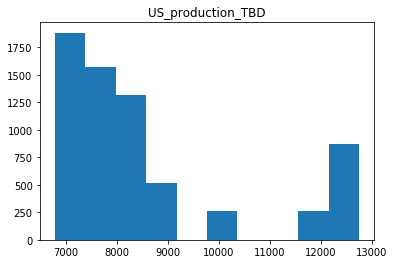

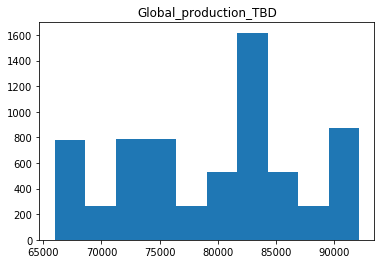

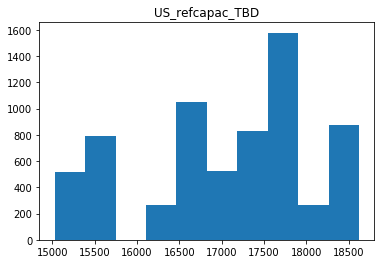

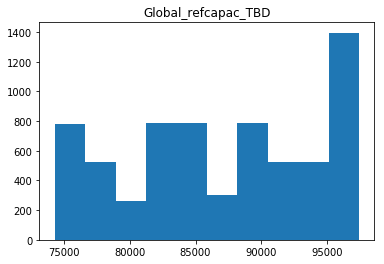

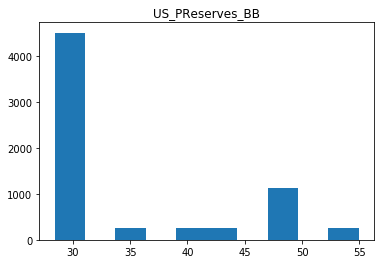

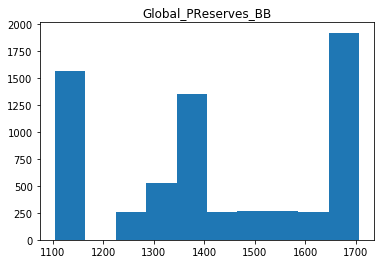

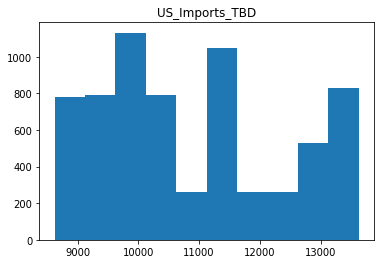

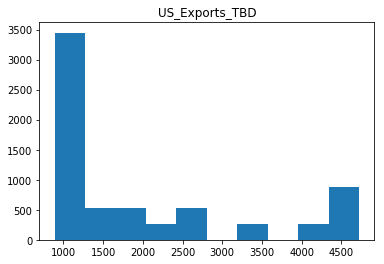

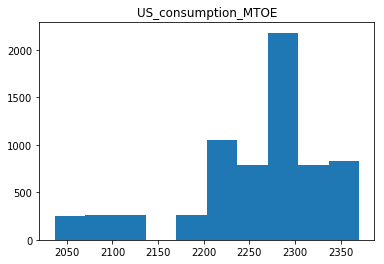

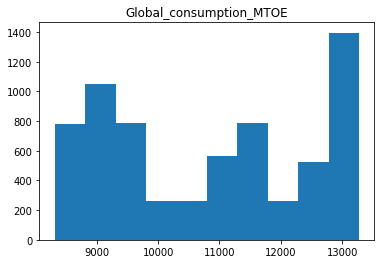

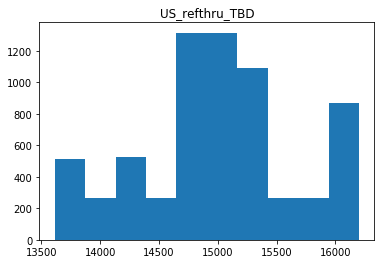

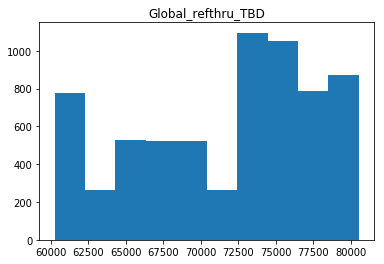

In [5]:
# Histograms for each to see distribution
for col in df:
    if col != 'us_retail_wk_DPG':
        plt.hist(df[col])
        plt.title(df[col].name)
        plt.show()

## Correlations

In [6]:
df.corr().sort_values('us_retail_wk_DPG', ascending=False)

,us_retail_wk_DPG,wti_crudefuturesc1_DPG,wti_crudefuturesc3_DPG,nyh_HU_RBOBc1_DPG,nyh_HU_RBOBc3_DPG,wti_OKcrudespot_DPB,us_crudestock_TB,us_refyield_wk_pct,us_refcrudeinput_wk_TBD,us_production_wk_TBD,...,US_refcapac_TBD,Global_refcapac_TBD,US_PReserves_BB,Global_PReserves_BB,US_Imports_TBD,US_Exports_TBD,US_consumption_MTOE,Global_consumption_MTOE,US_refthru_TBD,Global_refthru_TBD
us_retail_wk_DPG,1.000000,0.975546,0.976872,0.989499,0.984280,0.975335,0.536674,-0.277209,0.282506,0.073577,...,0.723172,0.800461,0.573551,0.815365,0.281618,0.573023,0.443119,0.832244,0.385910,0.770944
nyh_HU_RBOBc1_DPG,0.989499,0.981437,0.982142,1.000000,0.994612,0.981204,0.507845,-0.284472,0.263493,0.064990,...,0.699242,0.781125,0.564522,0.800531,0.267586,0.553903,0.423124,0.812190,0.360570,0.747117
nyh_HU_RBOBc3_DPG,0.984280,0.983634,0.985590,0.994612,1.000000,0.983243,0.520366,-0.240974,0.248712,0.071659,...,0.712106,0.792225,0.568998,0.808935,0.272897,0.566368,0.427188,0.824288,0.367697,0.758902
wti_crudefuturesc3_DPG,0.976872,0.998838,1.000000,0.982142,0.985590,0.998564,0.480416,-0.274452,0.210027,-0.009681,...,0.677992,0.753081,0.492732,0.768450,0.319346,0.501553,0.432159,0.785148,0.300618,0.719766
wti_crudefuturesc1_DPG,0.975546,1.000000,0.998838,0.981437,0.983634,0.999899,0.461317,-0.276233,0.208521,-0.009574,...,0.667098,0.742938,0.491857,0.760044,0.313588,0.493755,0.433765,0.774704,0.298948,0.709974
wti_OKcrudespot_DPB,0.975335,0.999899,0.998564,0.981204,0.983243,1.000000,0.459565,-0.276946,0.208231,-0.009640,...,0.665924,0.741883,0.491809,0.759027,0.312834,0.492883,0.433759,0.773541,0.298649,0.708855
Global_consumption_MTOE,0.832244,0.774704,0.785148,0.812190,0.824288,0.773541,0.828349,-0.029728,0.550107,0.423374,...,0.948822,0.990027,0.788741,0.976372,0.172518,0.865305,0.511932,1.000000,0.721590,0.972787
Global_PReserves_BB,0.815365,0.760044,0.768450,0.800531,0.808935,0.759027,0.787604,0.001605,0.526886,0.421012,...,0.926725,0.985254,0.811573,1.000000,0.108109,0.852177,0.470384,0.976372,0.691280,0.939303
Global_refcapac_TBD,0.800461,0.742938,0.753081,0.781125,0.792225,0.741883,0.804210,0.005626,0.578880,0.418270,...,0.967102,1.000000,0.785998,0.985254,0.181618,0.855742,0.546802,0.990027,0.757379,0.976888
Global_refthru_TBD,0.770944,0.709974,0.719766,0.747117,0.758902,0.708855,0.765754,0.017195,0.627113,0.364151,...,0.982939,0.976888,0.712407,0.939303,0.315548,0.803760,0.665263,0.972787,0.828158,1.000000


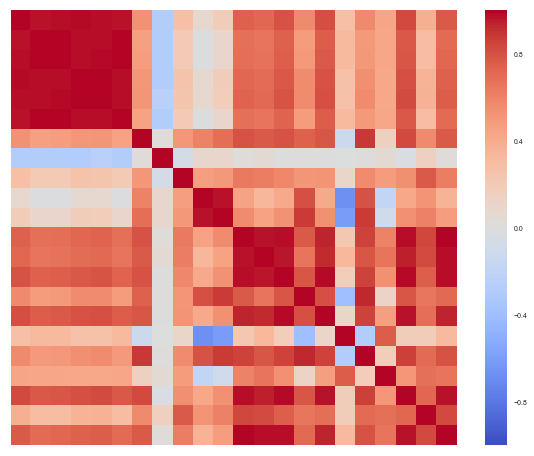

In [7]:
fig, ax = plt.subplots()

sns.set(font_scale=0.7)
fig.set_size_inches(10, 8)
sns.heatmap(df.corr(), cmap='coolwarm', xticklabels=False, yticklabels=False, vmin=-1, vmax=1, annot=False);  
#plt.savefig('Visuals/corr_heatmap.png', cpi=300)

## Boxplots

In [8]:
hi_group = [x for x in df.columns if (df[x].mean() > 60000) & (df[x].mean() < 100000)]
mid_group = [x for x in df.columns if (df[x].mean() < 20000) & (df[x].mean() > 5000)]
lo_group = [x for x in df.columns if df[x].mean() <10]

In [9]:
# plot
# fig, ax = plt.subplots()
# sns.set_style('ticks')
# sns.set(font_scale=2)
# fig.set_size_inches(10, 8)
# plt.xlabel('High Range Variables', fontsize=16)
# plt.xticks(rotation='20', fontsize=14)
# plt.ylabel('Distribution', fontsize=16)
# plt.yticks(fontsize=16)
# sns.boxplot(data=df[hi_group].dropna(), ax=ax);

## Regplots

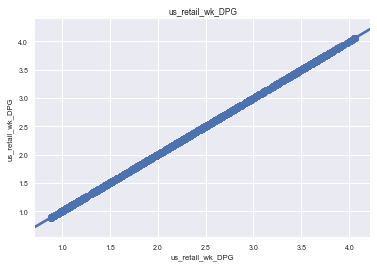

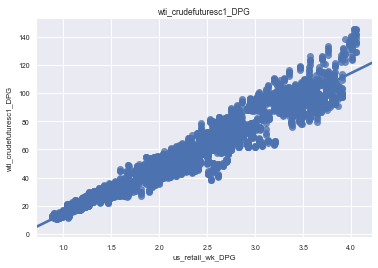

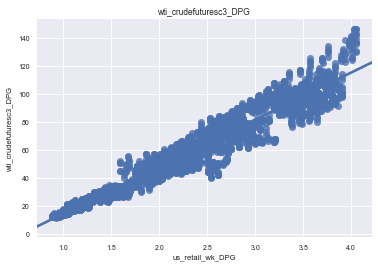

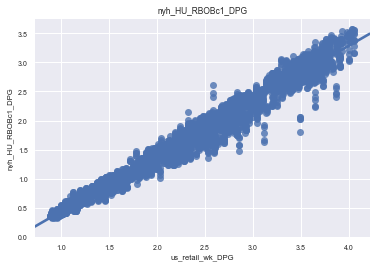

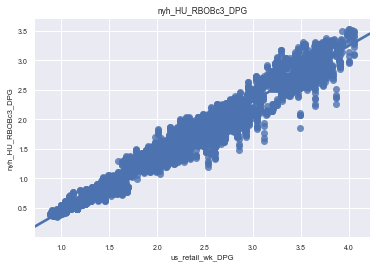

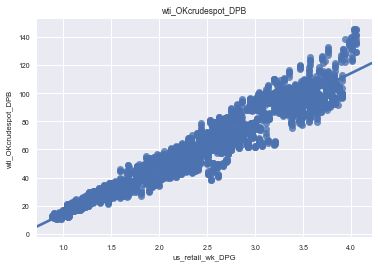

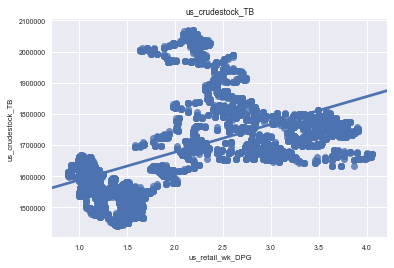

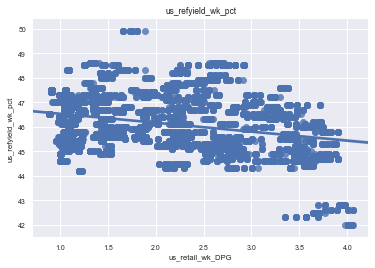

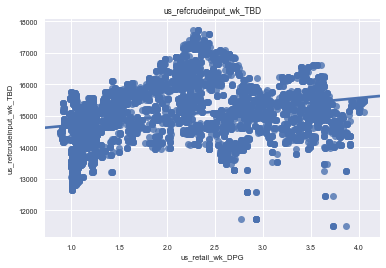

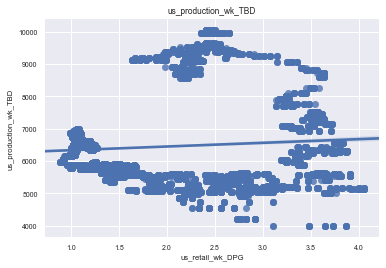

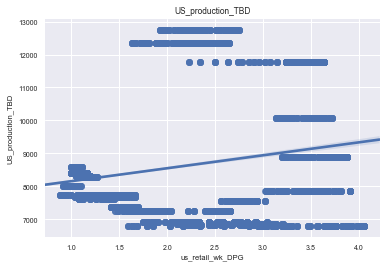

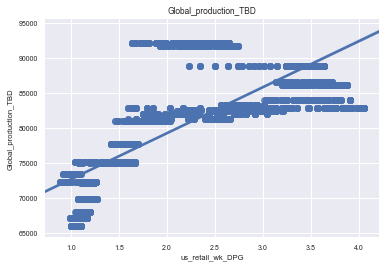

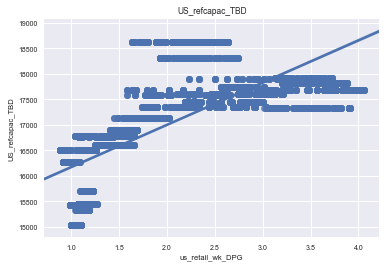

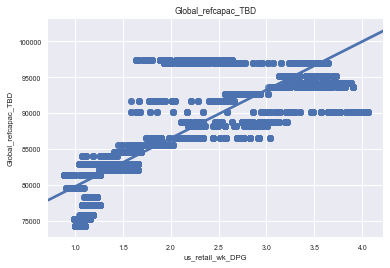

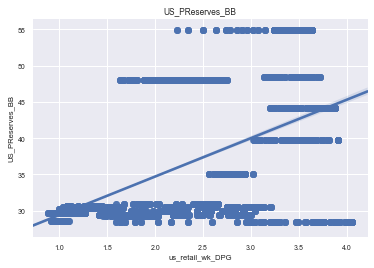

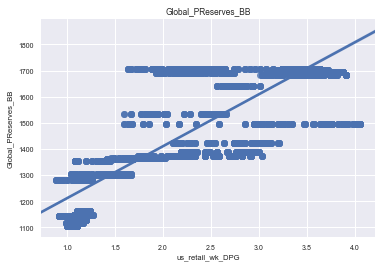

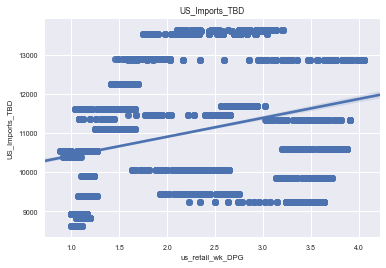

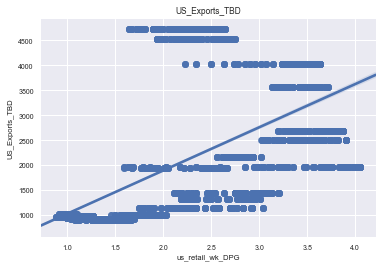

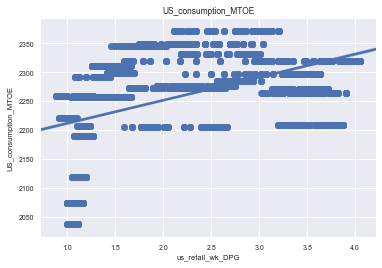

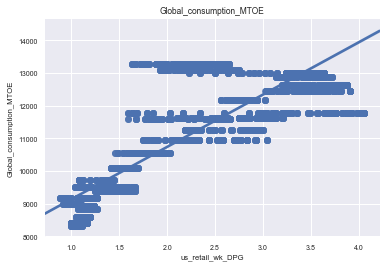

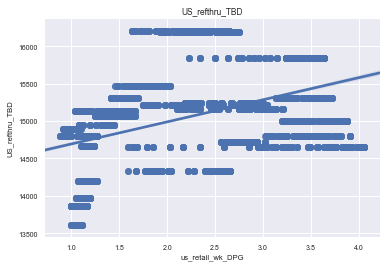

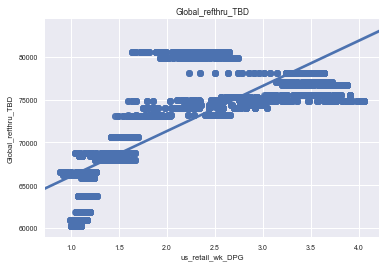

In [10]:
for col in df.columns:
    sns.regplot(x=df.us_retail_wk_DPG, y=df[col], data=df, ci=95).set_title(col)
    plt.show()

## Datetime / Timeseries Plots

In [11]:
# datetime data prep
# tweaking here to be able to more simply graph the dates. Seaborn doesn't readily plot datetime dtypes
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
df_ann = df.resample('Y').mean()
df_ann.reset_index(inplace=True)
df_ann.rename(columns={'index':'dt_date'}, inplace=True)
df_ann['x_year'] = df_ann['dt_date'].dt.year  #.astype('str')
df_ann = df_ann[['us_retail_wk_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG', 
        'wti_crudefuturesc1_DPG','wti_crudefuturesc3_DPG', 'us_crudestock_TB', 'us_refyield_wk_pct',
       'us_refcrudeinput_wk_TBD', 'us_production_wk_TBD', 'US_production_TBD',
       'Global_production_TBD', 'US_refcapac_TBD', 'Global_refcapac_TBD',
       'US_PReserves_BB', 'Global_PReserves_BB', 'US_Imports_TBD',
       'US_Exports_TBD', 'US_consumption_MTOE', 'Global_consumption_MTOE',
       'US_refthru_TBD', 'Global_refthru_TBD', 'wti_OKcrudespot_DPB',
       'x_year']]
# removed dt_date in df_ann because datetime not compatable with regression

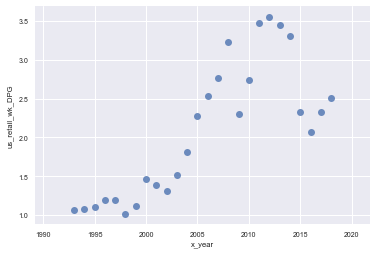

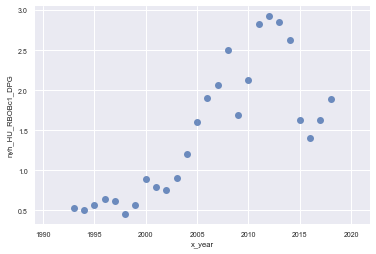

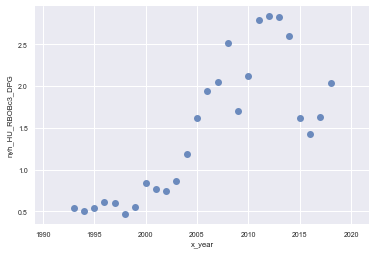

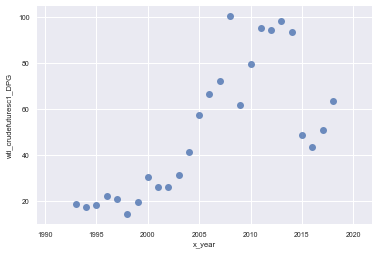

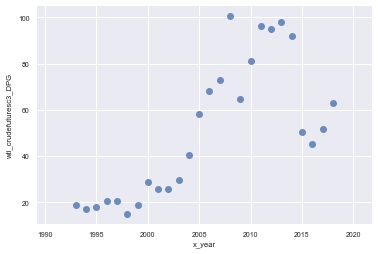

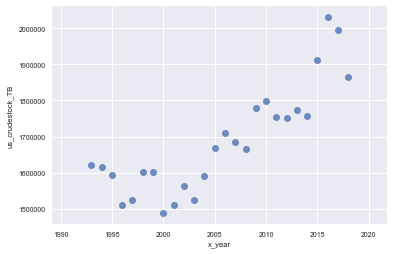

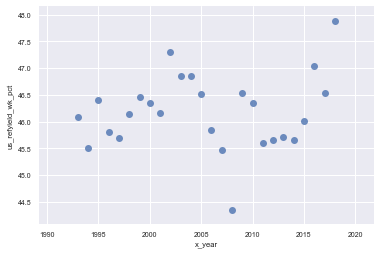

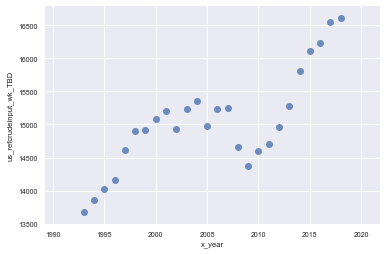

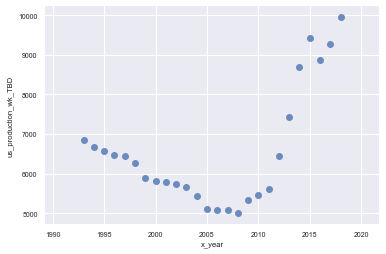

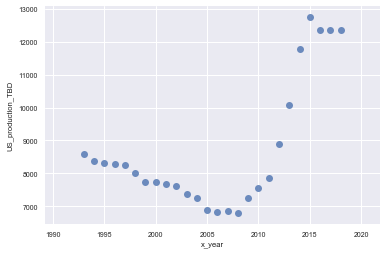

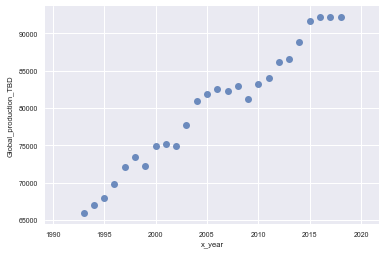

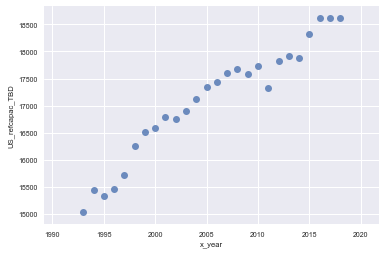

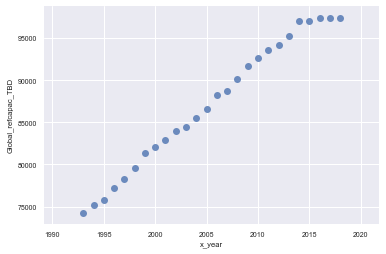

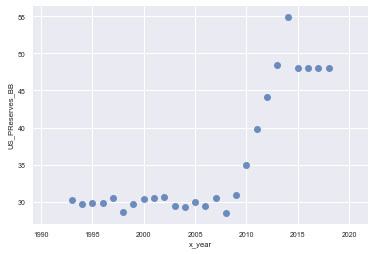

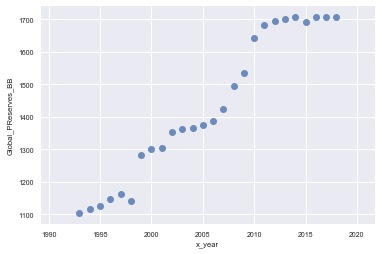

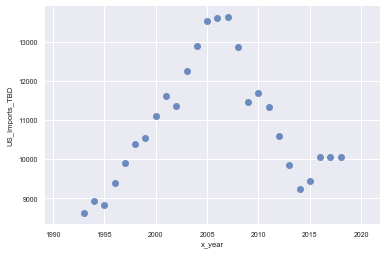

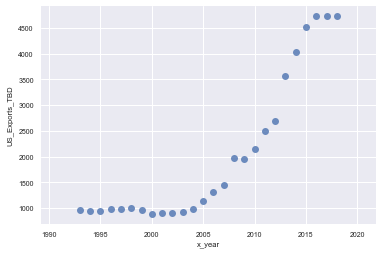

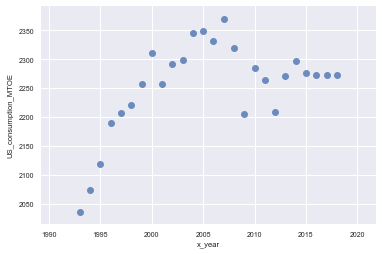

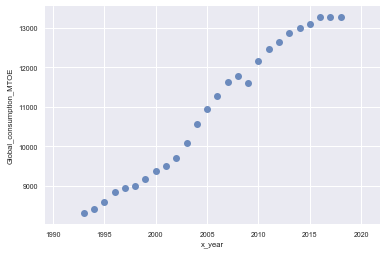

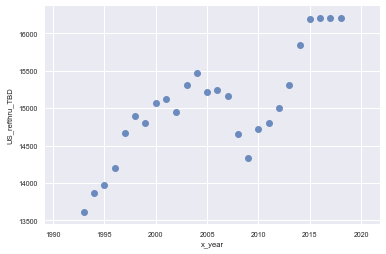

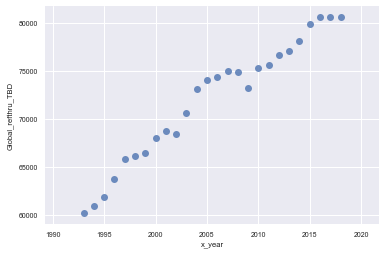

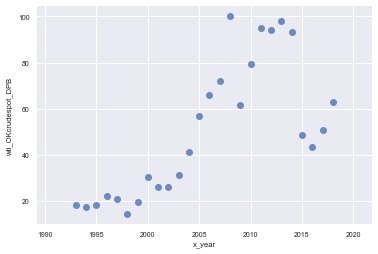

In [12]:
for col in df_ann.columns:
    if (col != 'dt_date') & (col != 'x_year'):
        sns.regplot(x=df_ann.x_year, y=df_ann[col], fit_reg=False)
        plt.show()

# Regression

In [13]:
# removing datetimeindex, removing datetime format, and forcing random re-organization of data
df_prep = df.reset_index()
df_prep.rename(columns={'index':'dt_date'}, inplace=True)
df_prep['year'] = df_prep['dt_date'].dt.year  #.astype('category')
df_prep = df_prep.drop('dt_date', axis=1)
df_prep = df_prep.sample(frac=1, random_state=42)

# Date Shift! (for actual predictions)
1. copy date + target variable (to be predicted = us_retail_wk_DPG)
2. shift the target variable manually (slice off head so that 30th row is now 1st (sorted by date)
3. rejoin target variable + date to original df_shift
 -- ensure indices are 0 based and all sorted by date.
4. check / confirm accurate info

In [14]:
df_target = df[['us_retail_wk_DPG']]
df_target = df_target.iloc[30:]
df_target.reset_index(inplace=True)
df_target.rename(columns={'index':'target_date', 'us_retail_wk_DPG':'target_price_DPG'}, inplace=True)

In [15]:
df_bs = df.reset_index()
df_bs.rename(columns={'index':'indicators_date'}, inplace=True)
# df_shifted = df_bs.merge(df_shift, left_index=True, right_index=True)
df_shift = pd.concat([df_bs, df_target], axis=1, join_axes=[df_bs.index])
# df_shifted.drop(df_shifted.columns[-3], axis=1, inplace=True)
df_shift.head()

,indicators_date,us_retail_wk_DPG,wti_crudefuturesc1_DPG,wti_crudefuturesc3_DPG,nyh_HU_RBOBc1_DPG,nyh_HU_RBOBc3_DPG,wti_OKcrudespot_DPB,us_crudestock_TB,us_refyield_wk_pct,us_refcrudeinput_wk_TBD,...,US_PReserves_BB,Global_PReserves_BB,US_Imports_TBD,US_Exports_TBD,US_consumption_MTOE,Global_consumption_MTOE,US_refthru_TBD,Global_refthru_TBD,target_date,target_price_DPG
0,1993-01-15,1.066,18.87,19.17,0.540,0.584,18.89,1602955.0,47.5,13022.0,...,30.179001,1104.298906,8620.0,959.0,2036.658912,8311.393212,13613.0,60245.501447,1993-02-26,1.047
1,1993-01-18,1.061,18.87,19.12,0.539,0.583,18.94,1602955.0,47.5,13022.0,...,30.179001,1104.298906,8620.0,959.0,2036.658912,8311.393212,13613.0,60245.501447,1993-03-01,1.042
2,1993-01-19,1.061,18.58,18.83,0.530,0.575,18.40,1602955.0,47.5,13022.0,...,30.179001,1104.298906,8620.0,959.0,2036.658912,8311.393212,13613.0,60245.501447,1993-03-02,1.042
3,1993-01-20,1.061,18.33,18.68,0.523,0.570,18.35,1602955.0,47.5,13022.0,...,30.179001,1104.298906,8620.0,959.0,2036.658912,8311.393212,13613.0,60245.501447,1993-03-03,1.042
4,1993-01-21,1.061,18.81,19.07,0.529,0.573,18.71,1602955.0,47.5,13022.0,...,30.179001,1104.298906,8620.0,959.0,2036.658912,8311.393212,13613.0,60245.501447,1993-03-04,1.042


In [16]:
df_shift.columns

Index(['indicators_date', 'us_retail_wk_DPG', 'wti_crudefuturesc1_DPG',
       'wti_crudefuturesc3_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG',
       'wti_OKcrudespot_DPB', 'us_crudestock_TB', 'us_refyield_wk_pct',
       'us_refcrudeinput_wk_TBD', 'us_production_wk_TBD', 'US_production_TBD',
       'Global_production_TBD', 'US_refcapac_TBD', 'Global_refcapac_TBD',
       'US_PReserves_BB', 'Global_PReserves_BB', 'US_Imports_TBD',
       'US_Exports_TBD', 'US_consumption_MTOE', 'Global_consumption_MTOE',
       'US_refthru_TBD', 'Global_refthru_TBD', 'target_date',
       'target_price_DPG'],
      dtype='object')

In [17]:
df_shift = df_shift[['target_price_DPG', 'target_date', 'us_retail_wk_DPG', 'indicators_date', 'wti_crudefuturesc1_DPG',
       'wti_crudefuturesc3_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG',
       'wti_OKcrudespot_DPB', 'us_crudestock_TB', 'us_refyield_wk_pct',
       'us_refcrudeinput_wk_TBD', 'us_production_wk_TBD', 'US_production_TBD',
       'Global_production_TBD', 'US_refcapac_TBD', 'Global_refcapac_TBD',
       'US_PReserves_BB', 'Global_PReserves_BB', 'US_Imports_TBD',
       'US_Exports_TBD', 'US_consumption_MTOE', 'Global_consumption_MTOE',
       'US_refthru_TBD', 'Global_refthru_TBD']]

## df_red / reduced to only 'key' features as defined by lasso below

In [18]:
df_red = df_prep[['us_crudestock_TB', 'Global_refcapac_TBD', 'US_Exports_TBD', 'Global_refthru_TBD']]

In [19]:
df_red2 = df_prep[['wti_crudefuturesc1_DPG', 'wti_crudefuturesc3_DPG','us_crudestock_TB', 'US_refcapac_TBD', 'nyh_HU_RBOBc1_DPG',
       'nyh_HU_RBOBc3_DPG', 'wti_OKcrudespot_DPB']]

In [20]:
# Algos not running with datetime. Quick fix to shift to meaningful types below (I think??). Otherwise later fix.
df_shift['indicators_year'] = df_shift['indicators_date'].dt.year.astype('category')
df_shift['indicators_month'] = df_shift['indicators_date'].dt.month.astype('category')
df_shift['indicators_day'] = df_shift['indicators_date'].dt.day.astype('category') 
df_shift['target_year'] = df_shift['target_date'].dt.year.astype('category')
df_shift['target_month'] = df_shift['target_date'].dt.month.astype('category')
df_shift['target_day'] = df_shift['target_date'].dt.day.astype('category')
df_shift.drop(['target_date','indicators_date'], axis=1, inplace=True)

In [21]:
df_shift = df_shift[['target_price_DPG', 'target_year',
       'target_month', 'target_day', 'us_retail_wk_DPG', 'indicators_year', 'indicators_month', 'indicators_day','wti_crudefuturesc1_DPG',
       'wti_crudefuturesc3_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG',
       'wti_OKcrudespot_DPB', 'us_crudestock_TB', 'us_refyield_wk_pct',
       'us_refcrudeinput_wk_TBD', 'us_production_wk_TBD', 'US_production_TBD',
       'Global_production_TBD', 'US_refcapac_TBD', 'Global_refcapac_TBD',
       'US_PReserves_BB', 'Global_PReserves_BB', 'US_Imports_TBD',
       'US_Exports_TBD', 'US_consumption_MTOE', 'Global_consumption_MTOE',
       'US_refthru_TBD', 'Global_refthru_TBD']]

In [22]:
df_shift.dropna(inplace=True)

# Where are NaNs?
# count_nan = len(df_shift) - df_shift.count()
# count_nan

In [23]:
df_shift_r = df_shift[['target_price_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG', 'us_retail_wk_DPG',
                       'wti_crudefuturesc3_DPG', 'wti_OKcrudespot_DPB',  
                       'wti_crudefuturesc1_DPG', 'target_year', 'target_month',
                       'indicators_year','indicators_month', 'us_crudestock_TB']]

In [24]:
df_shift_rshort = df_shift[['target_price_DPG', 'nyh_HU_RBOBc1_DPG', 'nyh_HU_RBOBc3_DPG', 'us_retail_wk_DPG',
                       'wti_crudefuturesc3_DPG', 'wti_OKcrudespot_DPB',  
                       'wti_crudefuturesc1_DPG', 'target_year', 'target_month',
                       'indicators_year','indicators_month']]

df_shift_rshort.rename(columns={'target_price_DPG':'target_price', 'nyh_HU_RBOBc1_DPG':'gas_c1','nyh_HU_RBOBc3_DPG':'gas_c3',
                               'us_retail_wk_DPG':'retail_#', 'wti_crudefuturesc3_DPG':'crude_c3', 'wti_OKcrudespot_DPB':'crudespt', 
                              'wti_crudefuturesc1_DPG':'crude_c1', 'target_year':'targ_yr', 'target_month':'targ_mo', 'indicators_year':'ind_yr', 'indicators_month':'ind_mo'}, inplace=True)
  

/Users/jas/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [25]:
df_scram = df_shift.sample(frac=1, random_state=42)
df_scram.head()

,target_price_DPG,target_year,target_month,target_day,us_retail_wk_DPG,indicators_year,indicators_month,indicators_day,wti_crudefuturesc1_DPG,wti_crudefuturesc3_DPG,...,US_refcapac_TBD,Global_refcapac_TBD,US_PReserves_BB,Global_PReserves_BB,US_Imports_TBD,US_Exports_TBD,US_consumption_MTOE,Global_consumption_MTOE,US_refthru_TBD,Global_refthru_TBD
5896,2.656,2015.0,6.0,5.0,2.393,2015,4,24,57.15,59.85,...,18315.000,96992.427275,47.987000,1691.453235,9450.424658,4520.705770,2275.907638,13104.998913,16188.000,79904.688563
217,0.999,1993.0,12.0,27.0,1.075,1993,11,12,16.72,17.29,...,15030.000,74288.272831,30.179001,1104.298906,8620.000000,959.000000,2036.658912,8311.393212,13613.000,60245.501447
3214,2.116,2005.0,5.0,20.0,2.251,2005,4,11,53.71,55.82,...,17338.814,86569.281098,29.922000,1374.389094,13525.235616,1129.350685,2348.706245,10938.957804,15220.088,74020.581049
4516,2.721,2010.0,3.0,9.0,2.666,2010,1,26,74.71,75.73,...,17736.370,92585.557823,34.990000,1642.427784,11689.282932,2154.309753,2284.068910,12169.982270,14724.000,75257.204614
1544,0.920,1999.0,1.0,12.0,0.954,1998,12,1,11.13,12.00,...,16261.000,79562.870613,28.558001,1142.411945,10382.000000,1011.000000,2220.597681,9002.171738,14889.000,66153.275154


# Defining X & y

In [26]:
# define X and y

# for graph only
# best: 
# X = df_shift_rshort.iloc[:,1:]
# y = df_shift_rshort.iloc[:,0]

# based on shifted AND scrambled data
# best: 
X = df_scram.iloc[:,1:]
y = df_scram.iloc[:,0]

# based on predict/shift data with reduced variables
# best: 
# X = df_shift_r.iloc[:,1:]
# y = df_shift_r.iloc[:,0]

# based on predict/shift data
# best: 
# X = df_shift.iloc[:,1:]
# y = df_shift.iloc[:,0]

# based on daily data (6500+ obs)
# X = df_prep.iloc[:,1:] 
# y = df_prep.iloc[:,0]

# #based on annualized data (26 observations)
# ann_X = df_ann.iloc[:,1:]
# ann_y = df_ann.iloc[:,0]

# # variable reduction: keeping only 4. Would be good to add futures on crude (6 wks prior) or 
# X_red = df_red.iloc[:,1:]
# y_red = df_red.iloc[:,0]

# # variable reduction: keeping only 6. (Futures added) 
# X_red2 = df_red2.iloc[:,1:]
# y_red2 = df_red2.iloc[:,0]

In [27]:
# make sure X & y as expected
len(y)

6654

## 1. LinearRegression() via test_train_fit w/ Adj_R^2

In [28]:
# adj R^2
# r2_adj = 1 - ((sum((y_test-results.predict(X_test))**2.0)/(len(X_test) - len(results.params) - 1))
#                 /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))

In [29]:
# https://www.programcreek.com/python/example/91152/sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# instantiate model
linreg = LinearRegression()
# fit model
linreg_fit = linreg.fit(X_train, y_train)
# y_pred = linreg.predict(X_test) #<<<<----- if I wanted the actual predictions...
linreg_score = linreg.score(X_test, y_test)

print(linreg_fit.coef_)
print('Basic LinearRegression R^2 score:   {}'.format(linreg_score))
r2_adj = 1 - ((sum((y_test-linreg.predict(X_test))**2.0)/(len(X_test) - len(X.columns) - 1))
                /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))
print('Basic LinearRegression adjR^2 score:    {}'.format(r2_adj))

[-1.71459433e+00 -1.44817804e-01 -4.66045875e-03 -1.27405258e-01
  1.75111346e+00  1.41678486e-01  4.66095371e-03  2.08728017e-02
 -1.15006844e-02  4.99311908e-01  5.56187305e-01 -1.17265675e-02
  2.62738900e-07 -3.93896235e-02  2.94516527e-06 -1.47136057e-05
  5.25007595e-05 -1.41485803e-05  4.40910986e-06 -3.15310640e-05
  4.74888264e-03  7.95066161e-05  1.09430072e-05 -1.74351887e-04
  3.49421469e-04  1.62617643e-04 -1.19188578e-04  1.22570101e-05]
Basic LinearRegression R^2 score:   0.9763985270913675
Basic LinearRegression adjR^2 score:    0.9753610997107683


## 2. LinearRegression() w/ cross_val_score

In [30]:
cv_score = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print('Cross Val Score (R2):    {}'.format(cv_score))

Cross Val Score (R2):    [0.97686912 0.9776725  0.97984117 0.97894291 0.97546447]


## 3. Lasso w/ coefficient plot (visual feature selection)

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


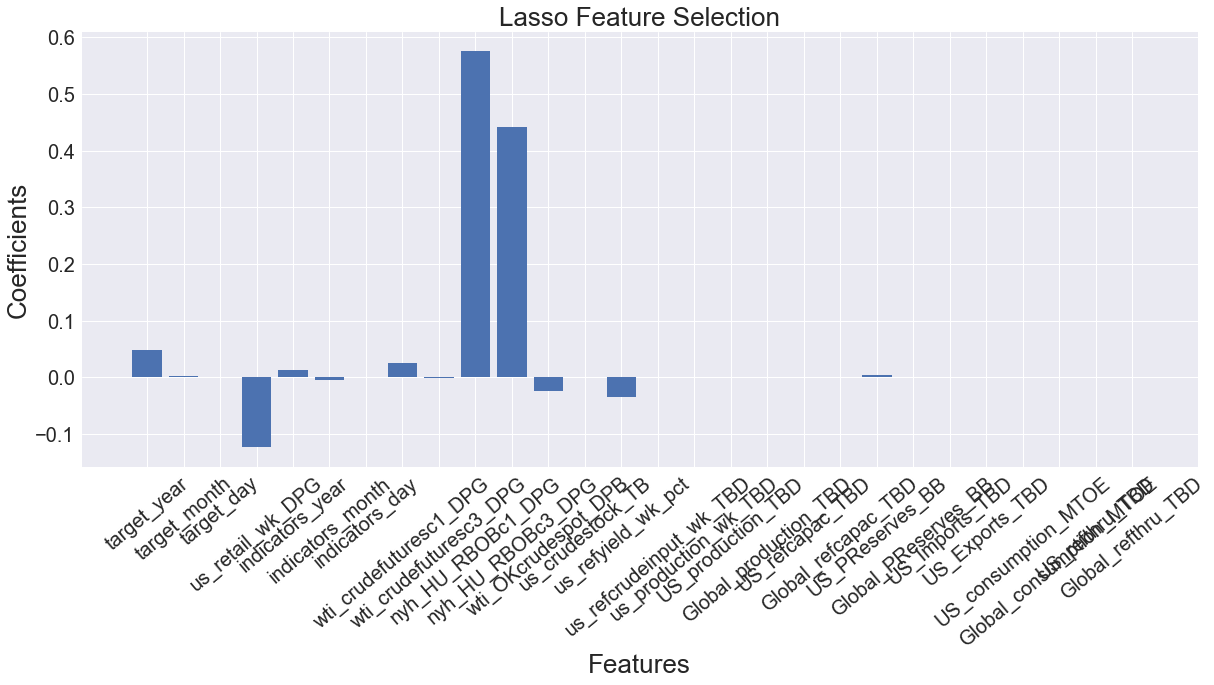

0.9761556818436762
0.01718157284086083
0.019629087761788424


In [31]:
# add polynomials into simplified (shift_r) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42) #tts
lasso = Lasso(alpha=1e-5, random_state=42)
lasso.fit(X_train, y_train)
lasso_coef = lasso.fit(X_train, y_train).coef_

plt.figure(figsize=(20,8))
plt.xticks(range(len(X.columns)), X.columns, rotation='40', fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('Coefficients', fontsize='26')
plt.xlabel('Features', fontsize='26')
plt.title('Lasso Feature Selection', fontsize='26')
plt.bar(range(len(X.columns)), lasso_coef)
#plt.savefig('Visuals/lasso_features2.png', cpi=300)
plt.show()


r2_adj = 1 - ((sum((y_test-lasso.predict(X_test)**2.0)/(len(X_test) - len(X.columns) - 1))
               /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1))))

print(lasso.score(X_test,y_test))
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

### Same Lasso, adding train_test_split

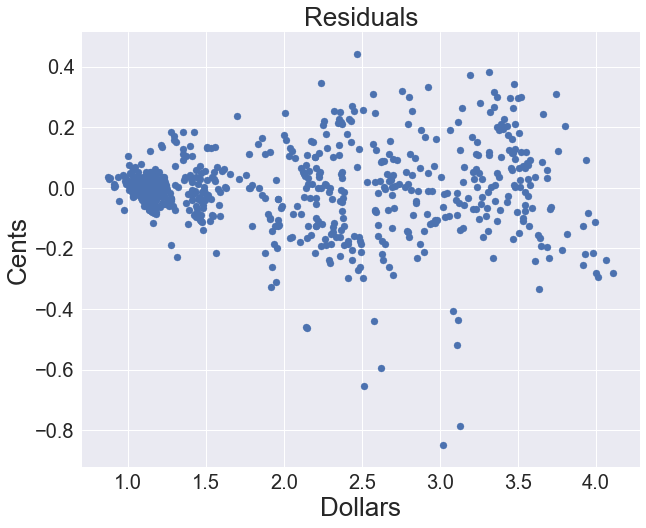

In [32]:
# residuals
plt.figure(figsize=(10,8))
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('Cents', fontsize='26')
plt.xlabel('Dollars', fontsize='26')
plt.title('Residuals', fontsize='26')
plt.scatter(lasso.predict(X_test), y_test-(lasso.predict(X_test)))
#plt.savefig('Visuals/residuals.png', cpi=300);

# 2. Model Application --> Deploy Trading Algorithm

In [48]:
# Create dataframe that includes prediction variable and actual values for comparison and application testing
y_pred = pd.DataFrame(lasso.predict(X_test))

yt_df = pd.DataFrame(y_test)
yt_df_joined = X_test.join(y_test, how='outer')
yt_df_joined.reset_index(inplace=True)
yt_df_joined = yt_df_joined.join(y_pred, how='outer')
yt_df_joined.rename(columns={0:'y_prediction_DPG', 'target_price_DPG':'y_actual_DPG', 'us_retail_wk_DPG':'current_retail_price_DPG'},inplace=True)
yt_df_joined = yt_df_joined[['y_prediction_DPG', 'y_actual_DPG', 'current_retail_price_DPG', 'nyh_HU_RBOBc1_DPG', 'target_year', 'target_month', 'target_day', 'indicators_year', 'indicators_month', 'indicators_day']]
yt_df_joined.head()

,y_prediction_DPG,y_actual_DPG,current_retail_price_DPG,nyh_HU_RBOBc1_DPG,target_year,target_month,target_day,indicators_year,indicators_month,indicators_day
0,2.580078,2.828,2.730,2.043,2005.0,10.0,15.0,2005,9,19
1,2.924606,2.974,3.002,2.205,2007.0,6.0,19.0,2007,5,8
2,1.025230,1.033,1.007,0.438,1994.0,4.0,18.0,1994,3,7
3,2.806420,2.917,2.772,2.077,2010.0,12.0,7.0,2010,10,25
4,1.037651,1.011,1.009,0.447,1994.0,4.0,7.0,1994,2,24


In [1]:
# Deployment model:
# anytime our prediction says the price will swing up or down by at least $0.10/gal, we buy $1000 of options with
# face value that is 10x the premium cost.

premium = 0
sell = 0
for x in range(len(yt_df_joined.y_actual_DPG)):
    if (yt_df_joined.y_prediction_DPG[x] - yt_df_joined.current_retail_price_DPG[x]) >= 0.10:
        premium += (1000 * 0.50)
        if 500*(yt_df_joined.y_actual_DPG[x] - (yt_df_joined.current_retail_price_DPG[x] + 0.05 ) >= 0):
            sell +=  10*(yt_df_joined.y_actual_DPG[x]) - (yt_df_joined.current_retail_price_DPG[x] + 0.05)
            
print(sell-premium)

NameError: name 'yt_df_joined' is not defined

In [ ]:
## >>>> More fundamentally in line with real options market... <<<<
premium = 0
sell = 0
for x in range(len(yt_df_joined.y_actual_DPG)):
    if (yt_df_joined.y_prediction_DPG[x] - yt_df_joined.current_retail_price_DPG[x]) >= 0.25:
        premium += (1000 * .30)
        if (yt_df_joined.y_actual_DPG[x] - (yt_df_joined.current_retail_price_DPG[x] + 0.40 ) >= 0):
            sell +=  1000*(yt_df_joined.y_actual_DPG[x]) - (yt_df_joined.current_retail_price_DPG[x] + 0.05)
            
print(sell-premium)

# Model Confirmation

## Lasso w/ alpha v. R^2 plot

In [42]:
def test_Lasso_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=[1e-5,1e-4,1e-3,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10]
    scores=[]
    for i,alpha in enumerate(alphas):
        lreg = Lasso(alpha=alpha)
        lreg.fit(X_train, y_train)
        scores.append(lreg.score(X_test, y_test))
    
    plt.figure(figsize=(10,8))
    plt.xlabel(r"$\alpha$", fontsize='26')
    plt.ylabel(r"score", fontsize='26')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.xscale('log')
    plt.title('Lasso', fontsize='26')
    plt.plot(alphas,scores)
    #plt.savefig('Visuals/alpha_v_rscore.png', dpi=300)
    plt.show()

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


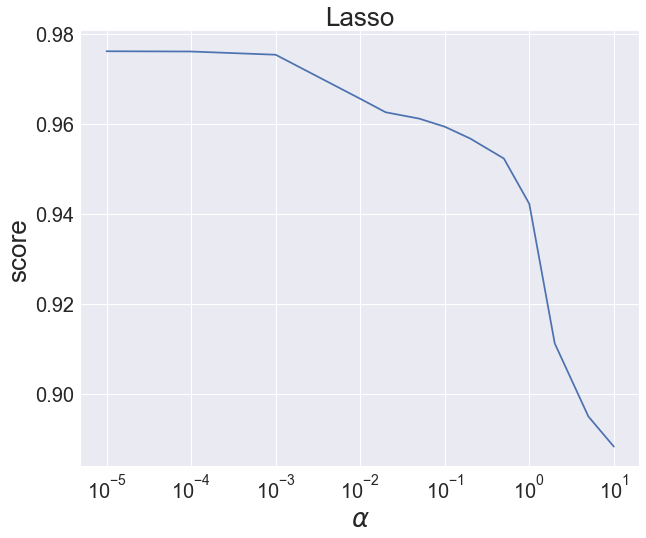

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
test_Lasso_alpha(X_train, X_test, y_train, y_test);

## GridSearchCV
#### Utilize for confirming model appropriateness.
GridSearch shuffles through a pre-defined set of hyperparameters and hyperparameter test values to identify the optimal hyperparameters. Confirms that previously tested Lasso model works best.

In [40]:
model = ElasticNet(tol=1e-4)
params= {'alpha': [10, 5, 3, 1, .99, 0.9, 1e-2, 1e-3, 1e-4], 'l1_ratio': [0.1, 0.2, 0.3, 0.7, 0.99, 1.0]}
fine_tuning = GridSearchCV(model, param_grid=params, scoring='r2') 
fine_tuning.fit(X, y)

print(fine_tuning.best_estimator_)
print(fine_tuning.best_params_)
print(fine_tuning.best_score_)

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0001, 'l1_ratio': 0.3}
0.9775263723659912


/Users/jas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# 3. Future Discovery and Performance - PolynomialFeatures( ) within Pipeline

In [ ]:
# pause here, running below is expensive
var = 

In [ ]:
# if we wanted polynomials on only specific original variables, then you can specify a slice from the X going 
# into the poly.fit_transform piece, then merge the result with the original dataset.

# to keep the column names and maintain interprettability

poly = (PolynomialFeatures(4))
X_poly = pd.DataFrame(poly.fit_transform(X))
X_poly.columns = poly.get_feature_names(X.columns)
len(X_poly.columns)

In [ ]:
# (3), Lasso(alpha=1e-3, random_state=42): adjR^2 score:    0.9789436810834727
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# parameters = {}
pipeline = make_pipeline(PolynomialFeatures(4), Lasso(alpha=1e-5, random_state=42)) # ElasticNet(), Lasso(alpha=1e-5, random_state=42)
pipeline.fit(X_train, y_train)
scored = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
#y_rmse = pipeline.mean_squared_error()

print("Poly'd Lasso R^2 score:   {}".format(scored))
r2_adj = 1 - ((sum((y_test-pipeline.predict(X_test))**2.0)/(len(X_test) - len(X.columns) - 1))
                /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))
print("Poly'd Lasso adjR^2 score:    {}".format(r2_adj))


In [ ]:
# this graphs the polynomial complexity vs. the accuracy to determine best fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean_squared_error)')
plt.xlabel('degree', fontsize='26')
plt.legend(loc='upper left', fontsize='26')